In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
from tqdm.notebook import tqdm
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
def load_data():
    train_data, validation_data, test_data = tfds.load(
        name="imdb_reviews",
        split=('train[:60%]', 'train[60%:]', 'test'),
        as_supervised=True)

    return train_data, validation_data, test_data

def build_model(optimizer='adam'):
    embedding = "https://tfhub.dev/google/nnlm-en-dim128-with-normalization/2"
    hub_layer = hub.KerasLayer(embedding, input_shape=[],
                               dtype=tf.string, trainable=True)

    model = tf.keras.Sequential([
        hub_layer,
        tf.keras.layers.Dense(32, activation='relu', name='hidden-layer-2'),
        tf.keras.layers.Dense(16, activation='relu', name='hidden-layer-3'),
        tf.keras.layers.Dense(1, name='output-layer')
    ])

    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

def train_model(model, train_data, validation_data, epochs=5):
    history = model.fit(train_data.shuffle(10000).batch(512),
                        epochs=epochs,
                        validation_data=validation_data.batch(512),
                        verbose=1)
    return history

def evaluate_model(model, test_data):
    results = model.evaluate(test_data.batch(512), verbose=2)

    for name, value in zip(model.metrics_names, results):
        print("%s: %.3f" % (name, value))

def plot_metrics(history):
    pd.DataFrame(history.history).plot(figsize=(10,7))
    plt.title("Metrics Graph")
    plt.show()

def prepare_test_data(test_data):
    texts = []
    true_labels = []
    for text, label in test_data:
        texts.append(text.numpy())
        true_labels.append(label.numpy())
    texts = np.array(texts)
    true_labels = np.array(true_labels)
    return texts, true_labels

def predict_and_evaluate(model, texts, true_labels):
    predicted_probs = model.predict(texts)
    predicted_labels = (predicted_probs > 0.5).astype(int)

    report = metrics.classification_report(true_labels, predicted_labels, target_names=['Negative', 'Positive'])
    print(report)

    cm = metrics.confusion_matrix(true_labels, predicted_labels)
    plot_confusion_matrix(cm, class_names=['Negative', 'Positive'])
    plt.title("Confusion Matrix")
    plt.show()


train_data, validation_data, test_data = load_data()
train_examples_batch, train_labels_batch = next(iter(train_data.batch(10)))

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompletePZIC3K/imdb_reviews-train.tfrecord…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompletePZIC3K/imdb_reviews-test.tfrecord*…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompletePZIC3K/imdb_reviews-unsupervised.t…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


Epoch 1/5
30/30 [==============================] - 114s 4s/step - loss: 0.7107 - accuracy: 0.5817 - val_loss: 0.5654 - val_accuracy: 0.7161
Epoch 2/5
30/30 [==============================] - 112s 4s/step - loss: 0.3925 - accuracy: 0.8420 - val_loss: 0.4269 - val_accuracy: 0.8537
Epoch 3/5
30/30 [==============================] - 110s 4s/step - loss: 0.2107 - accuracy: 0.9331 - val_loss: 0.3991 - val_accuracy: 0.8643
Epoch 4/5
30/30 [==============================] - 127s 4s/step - loss: 0.1301 - accuracy: 0.9658 - val_loss: 0.4658 - val_accuracy: 0.8807
Epoch 5/5
30/30 [==============================] - 112s 4s/step - loss: 0.0816 - accuracy: 0.9830 - val_loss: 0.4966 - val_accuracy: 0.8841
Epoch 1/5
30/30 [==============================] - 57s 2s/step - loss: 0.9412 - accuracy: 0.5575 - val_loss: 0.6399 - val_accuracy: 0.6338
Epoch 2/5
30/30 [==============================] - 58s 2s/step - loss: 0.5666 - accuracy: 0.7324 - val_loss: 0.4861 - val_accuracy: 0.7682
Epoch 3/5
30/30 [=====

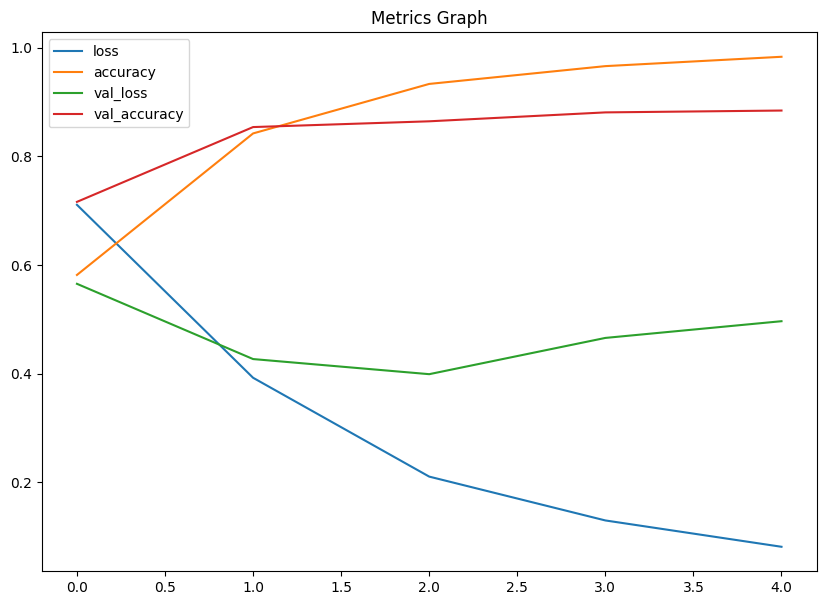

Evaluation results for RMSProp Optimizer:
49/49 - 22s - loss: 0.4043 - accuracy: 0.8468 - 22s/epoch - 453ms/step
loss: 0.404
accuracy: 0.847


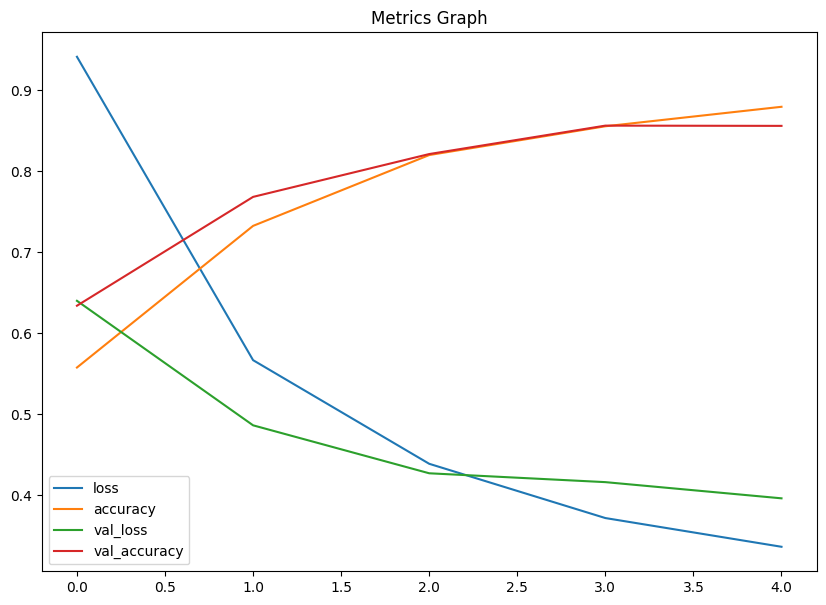

Evaluation results for SGD Optimizer:
49/49 - 22s - loss: 0.5838 - accuracy: 0.7251 - 22s/epoch - 457ms/step
loss: 0.584
accuracy: 0.725


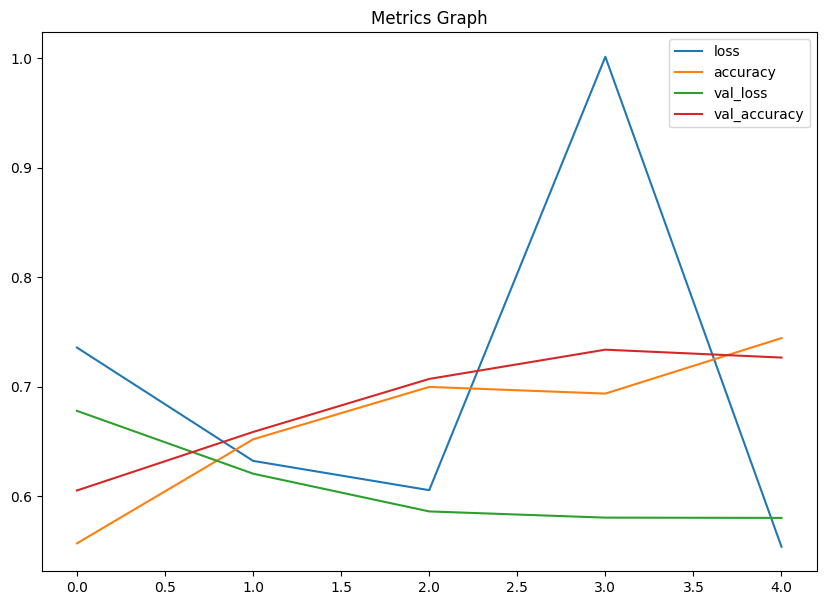

Evaluation results for Adam Optimizer:
782/782 [==============================] - 348s 445ms/step
              precision    recall  f1-score   support

    Negative       0.85      0.89      0.87     12500
    Positive       0.89      0.84      0.86     12500

    accuracy                           0.87     25000
   macro avg       0.87      0.87      0.87     25000
weighted avg       0.87      0.87      0.87     25000



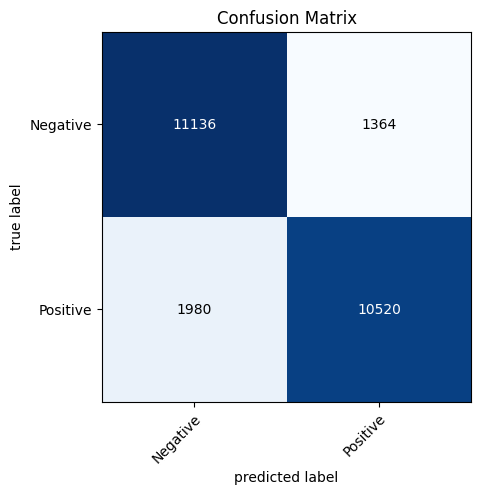

Evaluation results for RMSProp Optimizer:
782/782 [==============================] - 342s 437ms/step
              precision    recall  f1-score   support

    Negative       0.80      0.93      0.86     12500
    Positive       0.91      0.77      0.83     12500

    accuracy                           0.85     25000
   macro avg       0.86      0.85      0.85     25000
weighted avg       0.86      0.85      0.85     25000



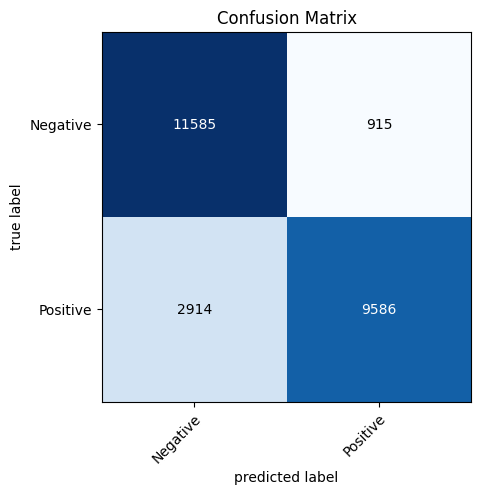

Evaluation results for SGD Optimizer:
782/782 [==============================] - 349s 446ms/step
              precision    recall  f1-score   support

    Negative       0.80      0.60      0.69     12500
    Positive       0.68      0.85      0.76     12500

    accuracy                           0.73     25000
   macro avg       0.74      0.73      0.72     25000
weighted avg       0.74      0.73      0.72     25000



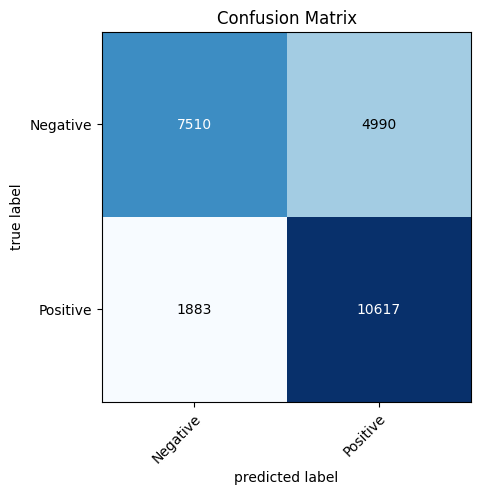

In [3]:
# Build models with different optimizers
model_adam = build_model(optimizer='adam')
model_rmsprop = build_model(optimizer='rmsprop')
model_sgd = build_model(optimizer='sgd')

# Train models
history_adam = train_model(model_adam, train_data, validation_data, epochs=5)
history_rmsprop = train_model(model_rmsprop, train_data, validation_data, epochs=5)
history_sgd = train_model(model_sgd, train_data, validation_data, epochs=5)

# Evaluate models
print("Evaluation results for Adam Optimizer:")
evaluate_model(model_adam, test_data)
plot_metrics(history_adam)

print("Evaluation results for RMSProp Optimizer:")
evaluate_model(model_rmsprop, test_data)
plot_metrics(history_rmsprop)

print("Evaluation results for SGD Optimizer:")
evaluate_model(model_sgd, test_data)
plot_metrics(history_sgd)

# Prepare test data
texts, true_labels = prepare_test_data(test_data)

# Predict and evaluate models
print("Evaluation results for Adam Optimizer:")
predict_and_evaluate(model_adam, texts, true_labels)

print("Evaluation results for RMSProp Optimizer:")
predict_and_evaluate(model_rmsprop, texts, true_labels)

print("Evaluation results for SGD Optimizer:")
predict_and_evaluate(model_sgd, texts, true_labels)